C:\Users\ashis\AppData\Local\Temp\ipykernel_19000\530721802.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(company, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
E:\VIKAS 2\JUPYTER FILE\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - loss: 0.0633
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0054
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.0052
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0045
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0044
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.0041
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.0037
Epoch 8/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.0044
Epoch 9/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.0037
Epoch 10/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.0035
Epoch 11/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.0035
Epoch 12/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.0033
Epoch 13/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.0031
Epoch 14/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.0029
Epoch 15/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - l

C:\Users\ashis\AppData\Local\Temp\ipykernel_19000\530721802.py:68: FutureWarning: YF.download() has changed argument auto_adjust default to True
  test_data = yf.download(company, start=test_start, end=test_end)
[*********************100%***********************]  1 of 1 completed


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step


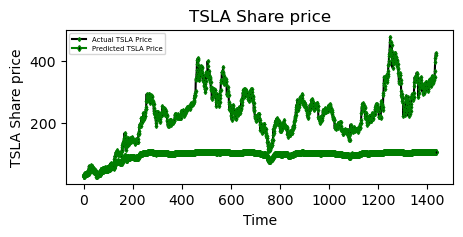

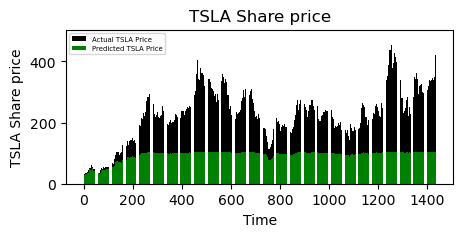

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: [[104.174934]]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import tensorflow as tf
import pandas_datareader as web
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler




from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Load data

company ='TSLA'
start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)

data = yf.download(company, start=start, end=end)
# data =web.DataReader(company, 'stooq', start, end)



# Prepare data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


# build the model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Prediction of the next closing

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size = 32)


# Load test data
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

# test_data = web.DataReader(company, 'stooq', test_start, test_end)
test_data = yf.download(company, start=test_start, end=test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

# Make Predictions on Tets Data

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the test predictions
plt.figure(figsize=(5,2))
plt.plot(actual_prices, color='black',marker="d",ms=2,mfc="k",mec="g", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green",marker="d",ms=3,mfc="k",mec="g", label=f"Predicted {company} Price")
plt.title(f"{company} Share price")
plt.xlabel('Time')
plt.ylabel(f"{company} Share price")
plt.legend(fontsize=5)
plt.show()

plt.figure(figsize=(5,2))
x_values=range(len(actual_prices))
plt.bar(x_values,actual_prices.flatten(), color='black', label=f"Actual {company} Price")
plt.bar(x_values,predicted_prices.flatten(), color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share price")
plt.xlabel('Time')
plt.ylabel(f"{company} Share price")
plt.legend(fontsize=5)
plt.show()

#Predict Next Day

real_data= [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")